In [14]:
import pandas as pd
import matplotlib as plt

In [19]:

#CONFIRMED
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

#CREA UNA TABLA DE CASOS DIARIOS CONFIRMED
confirmedByday=confirmed_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        confirmedByday.iloc[j,i]=confirmedByday.iloc[j,i]-confirmedByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40


#MUERTES
deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
deaths_df["Status"] = deaths_df.loc[:,'Status'] = 'Deaths'

#CREA UNA TABLA DE CASOS DIARIOS MUERTES
deathsByday=deaths_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        deathsByday.iloc[j,i]=deathsByday.iloc[j,i]-deathsByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

    
#RECOVERED    
recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
recovered_df["Status"] = recovered_df.loc[:,'Status'] = 'Recovered'
#CREA UNA TABLA DE CASOS RECUPERADOS
recoveredByday=recovered_df.copy()
i=40
j=0
while (j<=104):
    while (i >=5):
        recoveredByday.iloc[j,i]=recoveredByday.iloc[j,i]-recoveredByday.iloc[j,i-1]
        i = i - 1
    j=j+1
    i=40

## DATA ACUMULATIVAS
#  recovered_df
#  deaths_df
#  confirmed_df

## DATA DIARIAS
#  recoveredByday
#  deathsByday
#  confirmedByday

In [26]:
deathsByday.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deaths
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Deaths
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Deaths
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Deaths
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deaths


In [27]:
## COMBINED ACUMULATIVO
combined_data = pd.concat([confirmed_df, deaths_df, recovered_df])
combined_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,986,987,988,989,989,989,989,989,989,Confirmed
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,393,395,396,399,399,399,400,400,410,Confirmed
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,560,567,572,573,575,576,576,576,576,Confirmed
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,293,293,294,294,296,Confirmed
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,Confirmed


In [28]:
## COMBINED DIARIO
combined_Byday = pd.concat([confirmedByday, deathsByday, recoveredByday])
combined_Byday.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,Status
0,Anhui,Mainland China,31.8257,117.2264,1,8,6,24,21,10,...,4,1,1,1,0,0,0,0,0,Confirmed
1,Beijing,Mainland China,40.1824,116.4142,14,8,14,5,27,12,...,6,2,1,3,0,0,1,0,10,Confirmed
2,Chongqing,Mainland China,30.0572,107.8740,6,3,18,30,18,35,...,5,7,5,1,2,1,0,0,0,Confirmed
3,Fujian,Mainland China,26.0789,117.9874,1,4,5,8,17,24,...,1,0,0,0,0,0,1,0,2,Confirmed
4,Gansu,Mainland China,36.0611,103.8343,0,2,0,2,3,7,...,0,0,0,0,0,0,0,0,0,Confirmed


In [4]:
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Cases')
transposed_df.head()

,Province/State,Country/Region,Lat,Long,Status,Date,Cases
0,Anhui,Mainland China,31.8257,117.2264,Confirmed,1/22/20,1
1,Beijing,Mainland China,40.1824,116.4142,Confirmed,1/22/20,14
2,Chongqing,Mainland China,30.0572,107.8740,Confirmed,1/22/20,6
3,Fujian,Mainland China,26.0789,117.9874,Confirmed,1/22/20,1
4,Gansu,Mainland China,36.0611,103.8343,Confirmed,1/22/20,0


In [5]:
status_df = transposed_df.groupby(['Status','Date'])

cases = status_df['Cases'].sum()

status_summary = pd.DataFrame({"Cases": cases})
status_summary.reset_index()

,Status,Date,Cases
0,Confirmed,1/22/20,555
1,Confirmed,1/23/20,653
2,Confirmed,1/24/20,941
3,Confirmed,1/25/20,1434
4,Confirmed,1/26/20,2118
...,...,...,...
106,Recovered,2/5/20,1124
107,Recovered,2/6/20,1487
108,Recovered,2/7/20,2011
109,Recovered,2/8/20,2616


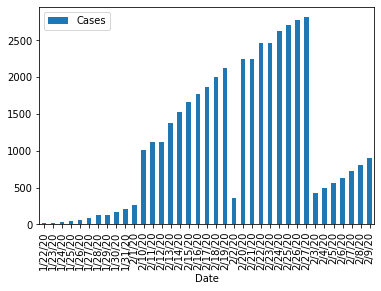

In [8]:
confirmed_summary = status_summary.loc['Deaths']
confirmed_summary.head()

confirmed_summary.plot(kind='bar')


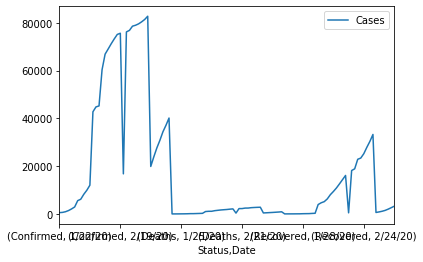

In [11]:
status_summary.plot(kind='line', stacked=True)